# Final Year CS - Predictive Analytics Project - Analysis & Predictions on Growth Rate of Startups - Case Study of a Department Store

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

   ###### Aditi Goyal - PRN: 18070122003
   ###### Aditya Banerjee - PRN: 18070122004
   ###### Aniket Mulik - PRN: 18070122008
   ###### Yashika Chhabaria - PRN: 18070122079

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
### Introduction:
The world of startups has never been more promising and volatile at the same time. Governments are pouring money into the startup ecosystem, but the guarantees of success by a startup are becoming less reliable. The focus has now gone from nurturing truly promising products into the consumer market to just mass innovation without the expected prerequisite of market analysis. In simpler terms, startups are fed to come up with any product, without even validating the purpose of the product and the potential impact that it has on the consumers. As such, yes, the number of startups have definitely increased, but the rate of innovation in products that disrupts the market has decreased.

It is also true that without letting a startup take shape and start their venture, it is not easy to predict whether the company will be a success. With our case study, we will take the data of a company that has been in the market for 7 years now. The reason for that is simple, we will take the data of the initial years and predict the growth of the company for the years to follow. We will then compare the predicted results to the actual result, include the degree of correctness within the model, and try to predict for the subsequent years as a prediction. The reason behind choosing the dataset of a company that is 7 years old is simple. There is a lot of data, and the higher the amount of data, the better the prediction model. This will allow us to analyse, process, predict, and validate our project, as well as contribute to what is essentially a case study which can be mapped to any startup of recent years.

Let us now begin with the technical stuff.

### Loading Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [2]:
df = pd.read_excel('Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Dataset Analysis and Preprocessing

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
df_2 = df
df_2['Month'] = df['Order Date'].dt.to_period('M')
df_2.sort_values(by='Month', inplace=True)
monthly_profit = df_2.groupby("Month")
unique_months = df_2.Month.unique()
df_2 = df_2.groupby(["Month"]).sum()
df_2.insert(3,"Month",unique_months,True)
df_2=df_2[['Month','Sales']]
df_2.head()

,Month,Sales
Month,,
2014-01,2014-01,14236.895
2014-02,2014-02,4519.892
2014-03,2014-03,55691.009
2014-04,2014-04,28295.345
2014-05,2014-05,23648.287


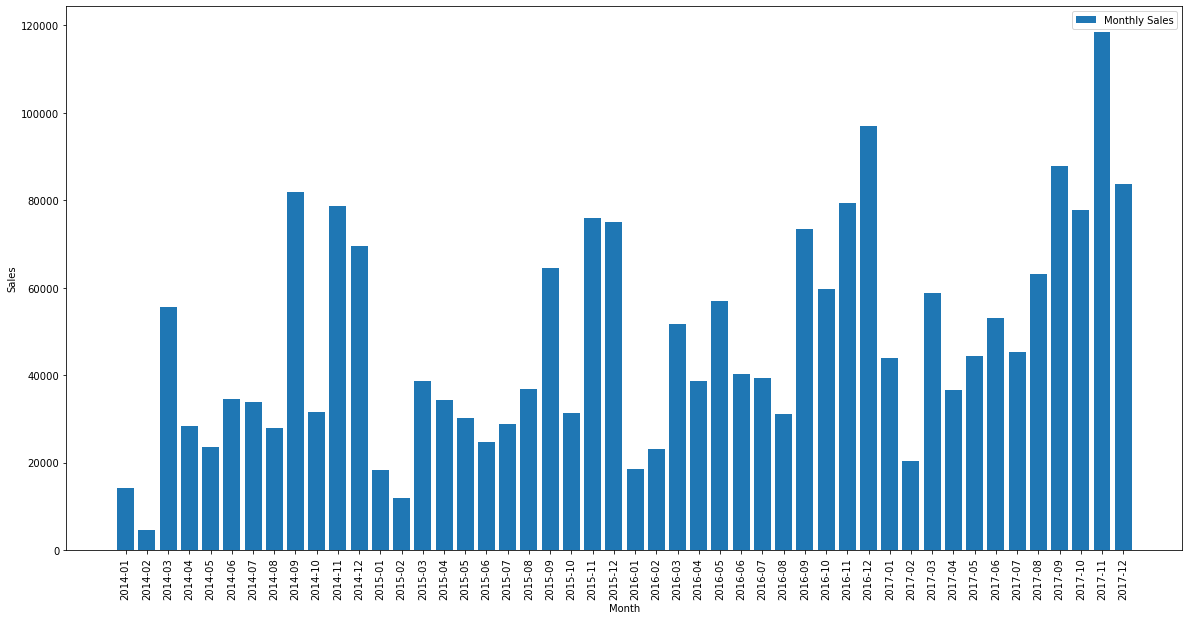

In [8]:
df_2['Month'] = df_2['Month'].dt.strftime("%Y-%m")
plt.bar(df_2.Month,df_2.Sales,label="Monthly Sales")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90);

#### Analysis:

After sorting and grouping the dataset and storing it as an intermediate dataframe without altering the original set, we have isolated the required data and cleaned it with all the preprocessing strategies. This is now the dataset which we will be working on for the rest of the study.

Firstly, we can see that the data corresponds to the monthly sales of the company. To visualise this, a simple bar graph was implemented. The choice of the bar graph was simple; we needed to see the values for each month and just compare them, ideal for a bar chart. 

Secondly, one can say that the monthly revenues were much higher near the end of the year compared to the start or even middle of the year. The significant spikes near the end of each year indicares as such. This is something very important to keep in mind for the rest of the project.

In [9]:
length = len(df_2['Sales'])
mgr = [0.0]*length
for n in range(2,length):
    mgr[n-1] = ((df_2.Sales[n]-df_2.Sales[n-1])/df_2.Sales[n-1])*100
df_2.insert(2,"Monthly Growth Rate (%)",mgr,True)
df_2.head()

,Month,Sales,Monthly Growth Rate (%)
Month,,,
2014-01,2014-01,14236.895,0.000000
2014-02,2014-02,4519.892,1132.131409
2014-03,2014-03,55691.009,-49.192257
2014-04,2014-04,28295.345,-16.423401
2014-05,2014-05,23648.287,46.290205


In [10]:
max_mgr = df_2["Monthly Growth Rate (%)"].max()
print("Maximum Monthly Growth Rate(%) = " + str(max_mgr))

Maximum Monthly Growth Rate(%) = 1132.1314093345595


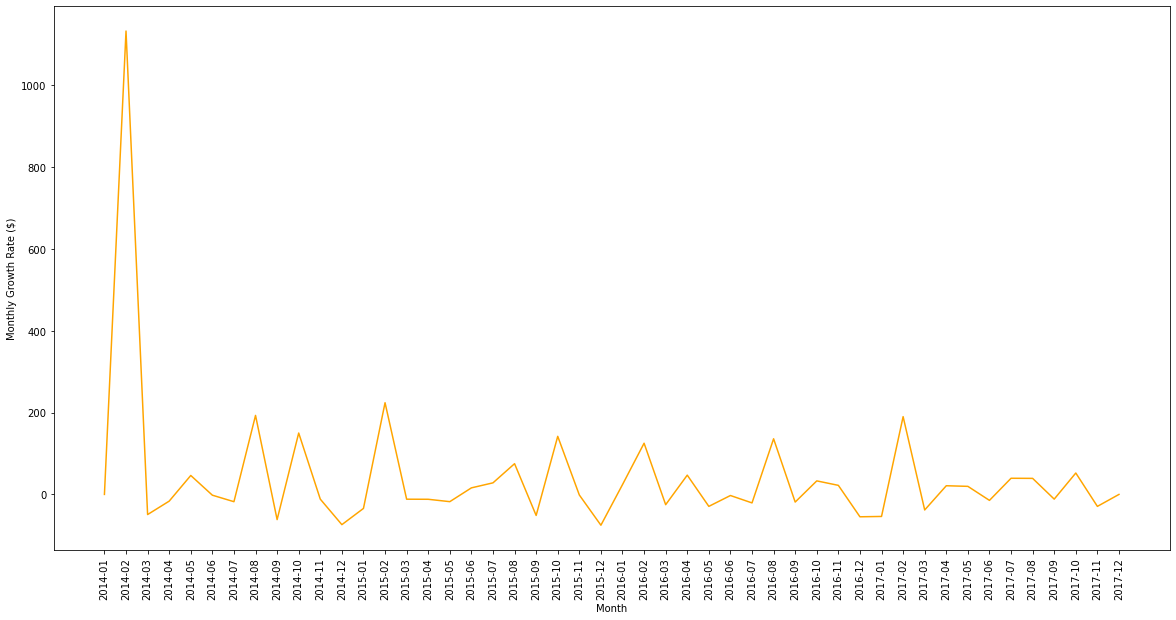

In [11]:
plt.plot(df_2.Month,df_2["Monthly Growth Rate (%)"],color='orange')
plt.xlabel("Month")
plt.ylabel("Monthly Growth Rate ($)")
plt.xticks(rotation=90);

#### Analysis:

Now, through basic calculations, we were able to determine the 'Monthly Growth Rate (%)'. This allows us to see the growth in sales for a particular month with respect to the previous month.

The choice for this graph was a simple line plot since it would help analyse the difference between the rate of growth for monthly income, as such being ideal for such analysis.

We can see clearly there is a massive peak in monthly income growth rate between the second and third month. Naturally, this peak is by far the highest since growth of the sales is most effective at the beginning of any venture, which is true for this particular data set as well.

However, the more important observation to note is how the graph goes below 0 % growth, suggesting sales being lower than the previous months for some instances. Furthermore, the overall trend of the graph does not increase, but rather stays somewhat at the same level. This allowed us to decide our approach. Since the general rate is constant for all the months, a linear regression would be the most appropriate, as constant rate shows a constant gradient.

### Dataset Filtration for Training and Prediction models

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_3 = df

df_3['Order Date']=le.fit_transform(df_3['Order Date'])
x_features = ["Order Date"]
x=df_3[x_features]
y=df_3["Sales"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### Training Model

In [83]:
from sklearn.linear_model import LinearRegression
linreg_1=LinearRegression()
linreg_1.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

### Linear Regression

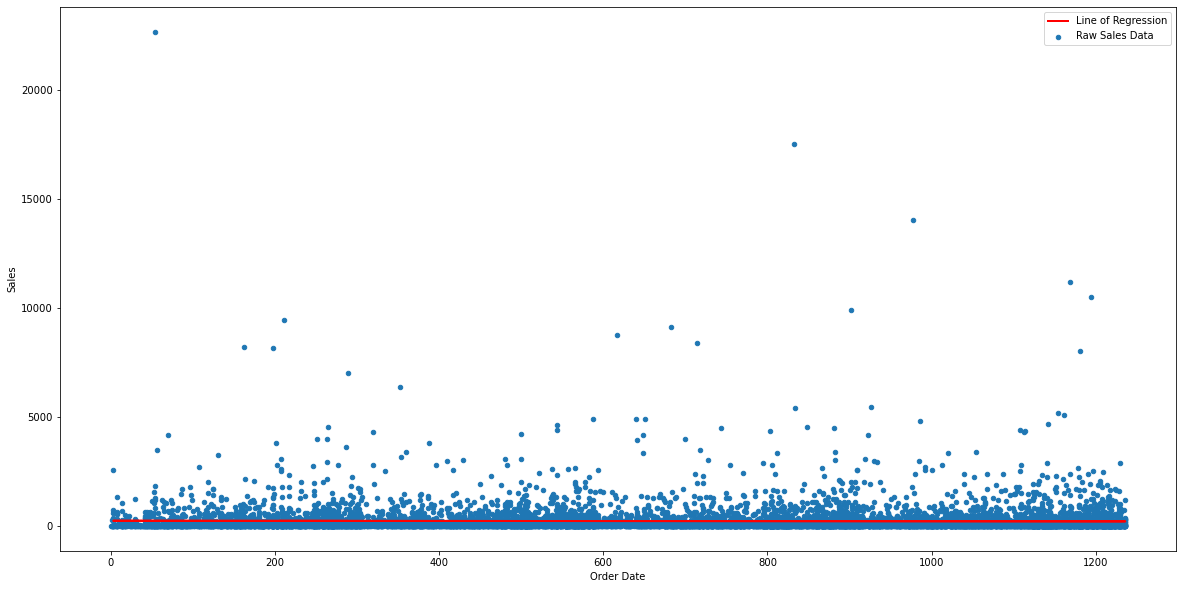

In [84]:
y_predict_1 = linreg_1.predict(x_test)
df_3.plot(kind='scatter',x='Order Date',y='Sales',label="Raw Sales Data")
plt.plot(x_test,y_predict_1,c='red',linewidth=2,label="Line of Regression")
plt.legend()

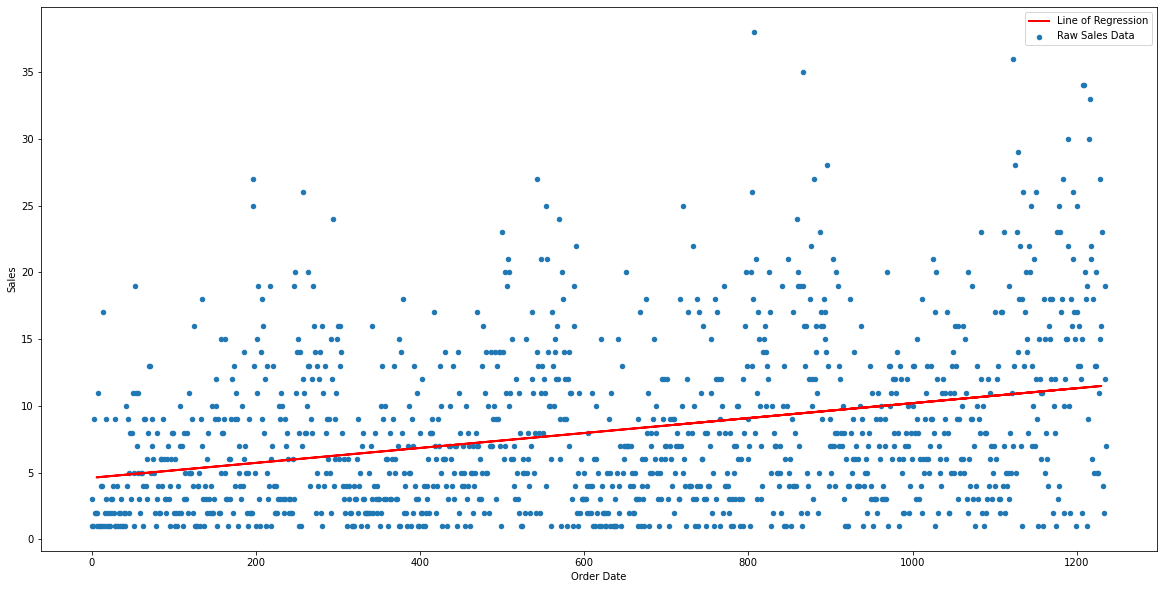

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_5 = df
df_5.sort_values(by='Order Date', inplace=True)
unique_dates = df_5['Order Date'].unique()
df_5 = df_5.groupby(["Order Date"]).count()
df_5.insert(3,"Order Date",unique_dates,True)
df_5['Order Date']=le.fit_transform(df_5['Order Date'])
x_features = ["Order Date"]
x=df_5[x_features]
y=df_5["Sales"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_predict = linreg.predict(x_test)
df_5.plot(kind='scatter',x='Order Date',y='Sales',label="Raw Sales Data")
plt.plot(x_test,y_predict,c='red',linewidth=2,label="Line of Regression")
plt.legend()

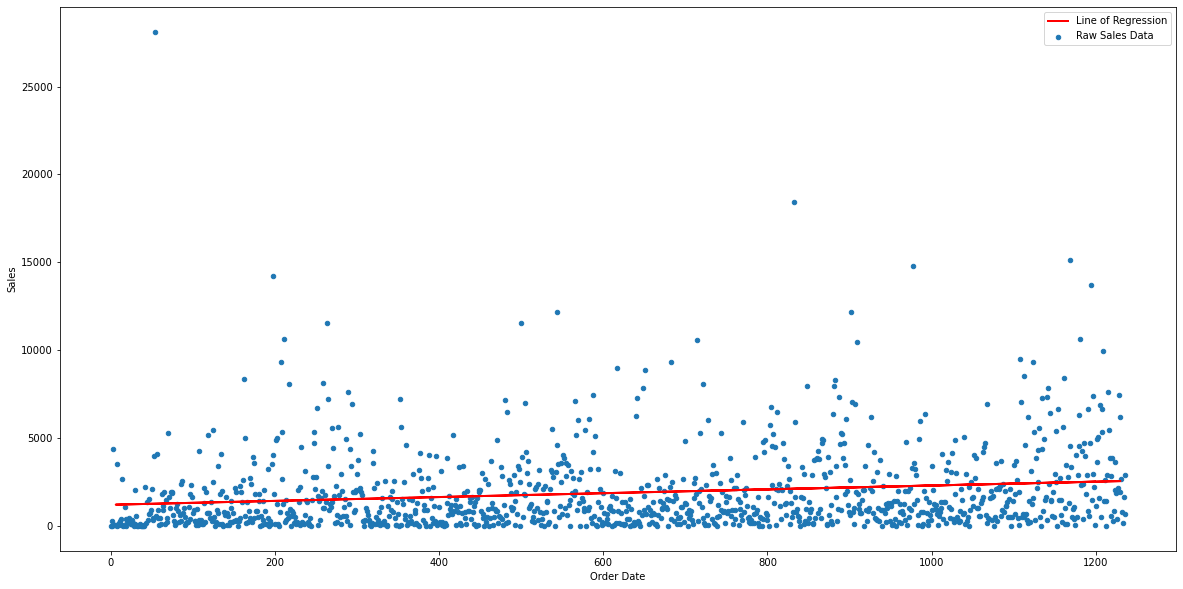

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_4 = df
df_4.sort_values(by='Order Date', inplace=True)
unique_dates = df_4['Order Date'].unique()
df_4 = df_4.groupby(["Order Date"]).sum()
df_4.insert(3,"Order Date",unique_dates,True)
df_4['Order Date']=le.fit_transform(df_4['Order Date'])
x_features = ["Order Date"]
x=df_4[x_features]
y=df_4["Sales"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
linreg_4=LinearRegression()
linreg_4.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_predict_4 = linreg_4.predict(x_test)
df_4.plot(kind='scatter',x='Order Date',y='Sales',label="Raw Sales Data")
plt.plot(x_test,y_predict_4,c='red',linewidth=2,label="Line of Regression")
plt.legend()

In [87]:
acc = [0]*4
from sklearn import metrics
y_mean = np.mean(y_predict_4)
print('Mean Absolute Error:', metrics.mean_absolute_error(x_test, y_predict_4))
print('Mean Squared Error:', metrics.mean_squared_error(x_test, y_predict_4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_test, y_predict_4)))
acc[0] = (1+(((metrics.mean_absolute_error(x_test, y_predict_4)-y_mean)/y_mean)))*100
print(acc[0])

Mean Absolute Error: 1269.7200197403063
Mean Squared Error: 1613299.9405217648
Root Mean Squared Error: 1270.157447138647
68.85418942190682


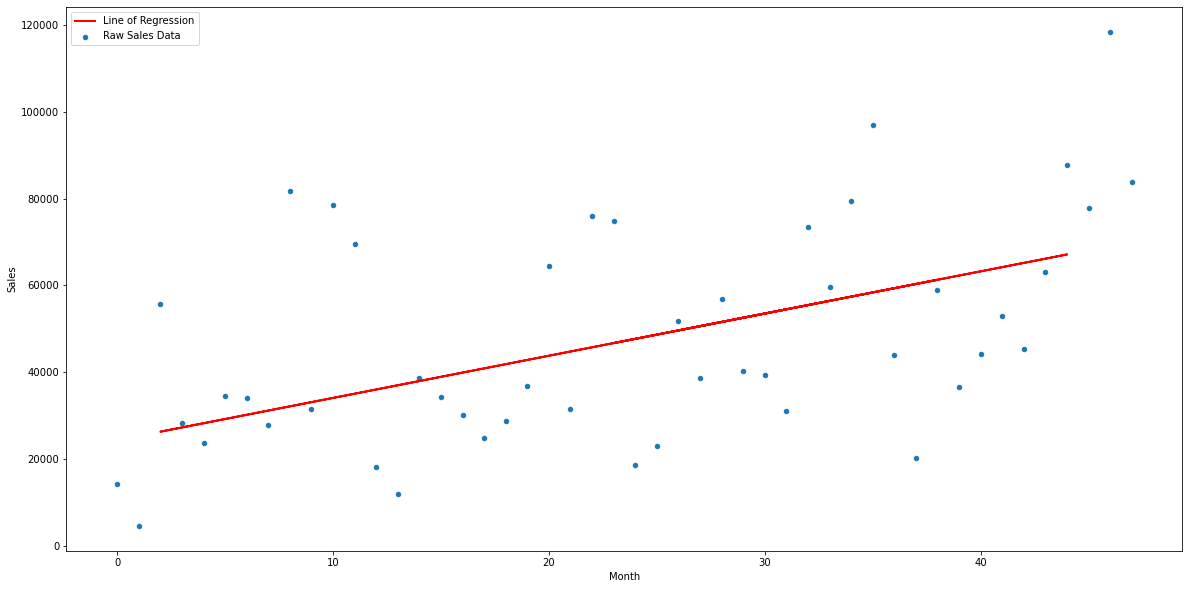

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_2['Month']=le.fit_transform(df_2['Month'])
x_features = ["Month"]
x=df_2[x_features]
y=df_2["Sales"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
y_predict = linreg.predict(x_test)
df_2.plot(kind='scatter',x='Month',y='Sales',label="Raw Sales Data")
plt.plot(x_test,y_predict,c='red',linewidth=2,label="Line of Regression")
plt.legend()

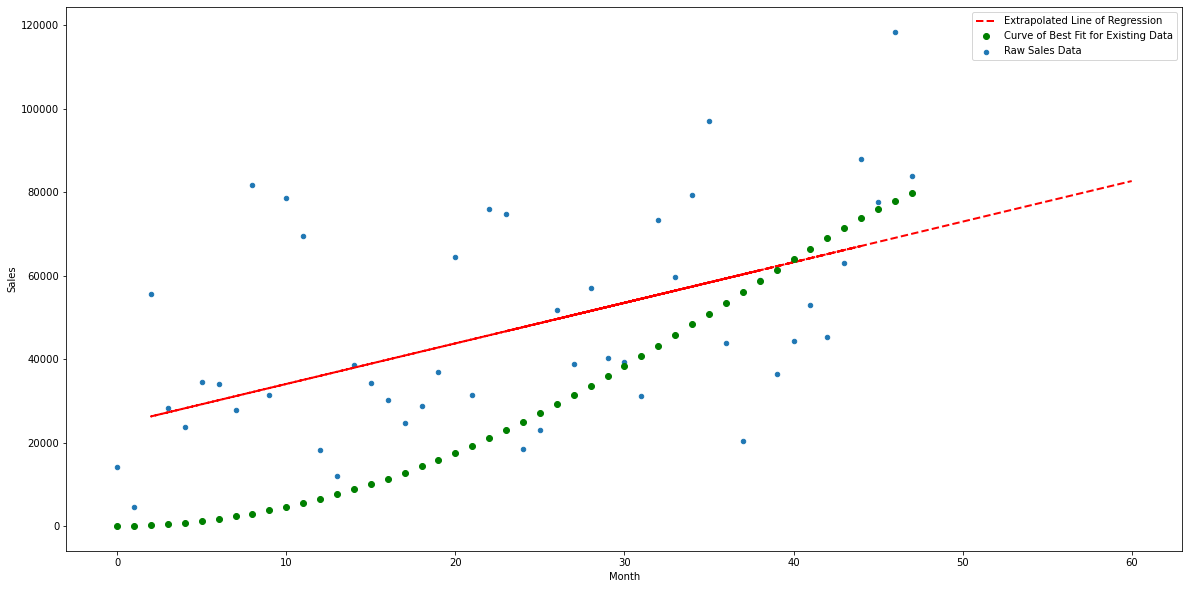

In [89]:
df_2.plot(kind='scatter',x='Month',y='Sales',label="Raw Sales Data")
x_test_2 = x_test
added_x = pd.DataFrame([49,50,51,52,53,54,55,56,57,58,59,60], columns=['Month'])
x_test_2 = x_test_2.append(added_x,ignore_index=True)
y_predict_2 = linreg.predict(x_test_2)
plt.plot(x_test_2,y_predict_2,'--',c='red',linewidth=2, label="Extrapolated Line of Regression")
from scipy.optimize import curve_fit
def test(x, a, b):
    return(a*x**2 + b*x**3 + b*x**4 + b*x**5 + b*x**6 + b*x**7)
x_test_2 = x_test_2['Month'].to_numpy()
x_test_2.reshape(-1,1)
y_predict_2.reshape(-1,1)
param, param_cov = curve_fit(test, x_test_2, y_predict_2)
ans = param[0]*x + param[0]*x**2 + param[1]*x**3 + param[1]*x**4 + param[1]*x**5 + param[1]*x**6 + param[1]*x**7
plt.plot(x, ans, 'o', color ='green', label ="Curve of Best Fit for Existing Data")
plt.legend()

#### Analysis:

After progressing into the model, something apart from the mere prediction of sales caught our eyes. The consistent oscillating data points. This resulted in us questioning the results of the linear regressor, and our objective had a minor discourse.

From this point on, our project is working on verifying the result of the linear regressor. The approach was, naturally, more machine learning. We now wanted to predict the likelihood of the datapoints lying above and below the line of regression.

Since we are talking about likelihood, which is probability, we decided to branch into two other machine learning models, namely Logistic Regression and Random Forest Regression.

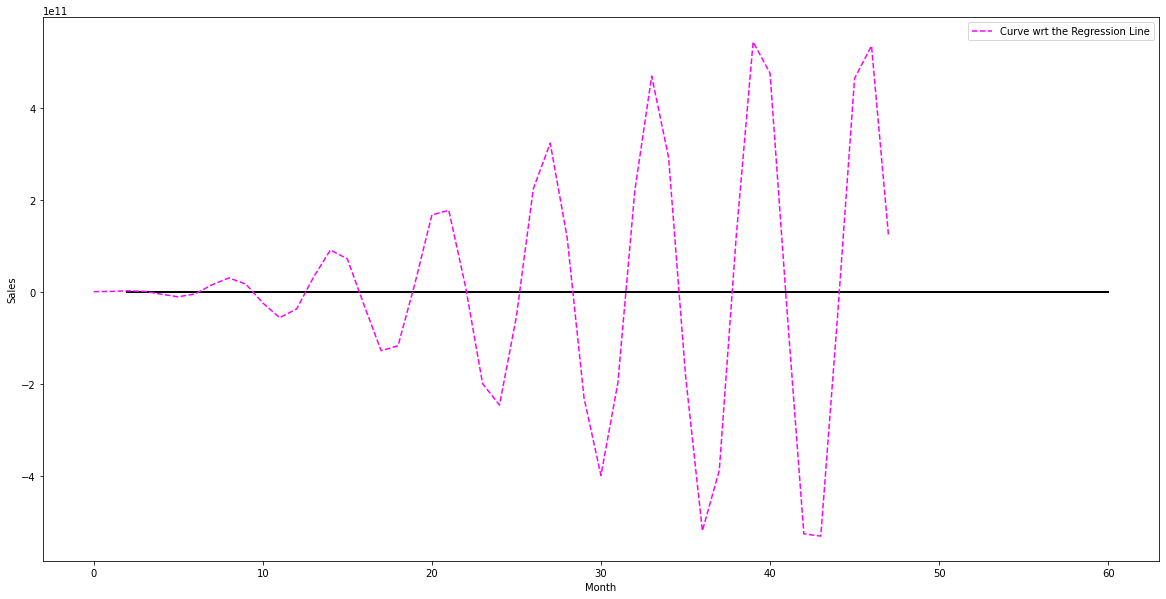

In [90]:
plt.plot(x_test_2,y_predict_2,c='black',linewidth=2)
from scipy.optimize import curve_fit
def test(x, a, b):
    return(a*x**2*np.sin(b * x) - b*x**3*np.sin(b * x) + b*x**4*np.sin(b * x) - b*x**5*np.sin(b * x) + b*x**6*np.sin(b * x) - b*x**7*np.sin(b * x))
param, param_cov = curve_fit(test, x_test_2, y_predict_2)
ans = param[0]*x**2*(np.sin(param[1]*x)) - param[1]*x**3*(np.sin(param[1]*x)) + param[1]*x**4*(np.sin(param[1]*x)) - param[1]*x**5*(np.sin(param[1]*x)) + param[1]*x**6*(np.sin(param[1]*x)) - param[1]*x**7*(np.sin(param[1]*x))
plt.plot(x, ans, '--', color ='magenta', label ="Curve wrt the Regression Line")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()

### Logistic Regression

In [91]:
#df.insert(3,"Lin Reg Result",y_predict_1,True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_6=df_4
#df_6['Order Date']=le.fit_transform(df_6['Order Date'])
x=df_6['Order Date'].to_numpy()
x=x.reshape(-1,1)
y=linreg_4.coef_*x + linreg_4.intercept_
y_log = [0]*len(y)
temp = df_4['Sales']
for a in range(0,len(temp)):
    if temp[a] >= y[a]:
        y_log[a] += 1
df_6.insert(3,"Log y",y_log,True)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y_log)
model.predict_proba(x)
y_pred_log = model.predict(x)
df_6

,Row ID,Postal Code,Sales,Log y,Order Date,Quantity,Discount,Profit
Order Date,,,,,,,,
0,7981,77095,16.4480,0,0,2,0.20,5.5512
1,2223,181620,288.0600,0,1,8,1.20,-65.9901
2,1760,19143,19.5360,0,2,3,0.20,4.8840
3,64855,417594,4407.1000,1,3,30,0.00,1358.0524
4,15323,154680,87.1580,0,4,10,1.40,-71.9621
...,...,...,...,...,...,...,...,...
1232,18429,243617,814.5940,0,1232,12,0.90,61.1202
1233,5141,86110,177.6360,0,1233,6,0.60,-31.9742
1234,81880,1135023,1657.3508,0,1234,64,4.12,253.1188


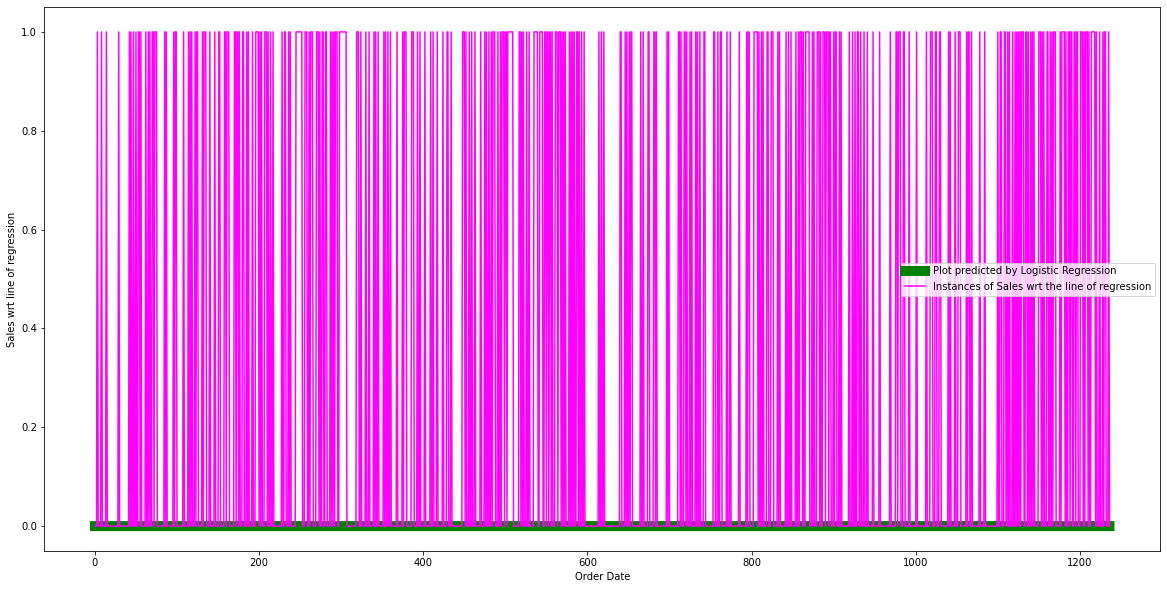

In [92]:
plt.plot(x, y_pred_log, color ='green', linewidth = 10, label ="Plot predicted by Logistic Regression")
plt.plot(x, y_log, color ='magenta', label ="Instances of Sales wrt the line of regression")
plt.xlabel("Order Date")
plt.ylabel("Sales wrt line of regression")
plt.legend()

In [93]:
print(model.score(x,y_log))
acc[1] = model.score(x,y_log)*100

0.67178658043654


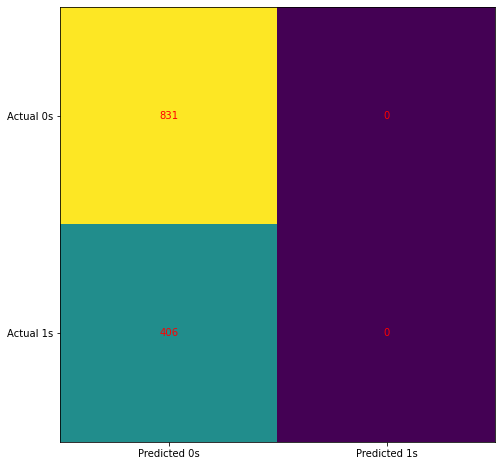

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_log, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [95]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_log, y_pred_log))
print('Mean Squared Error:', metrics.mean_squared_error(y_log, y_pred_log))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_log, y_pred_log)))

Mean Absolute Error: 0.32821341956346
Mean Squared Error: 0.32821341956346
Root Mean Squared Error: 0.5728991355932211


### Random Forest Regression

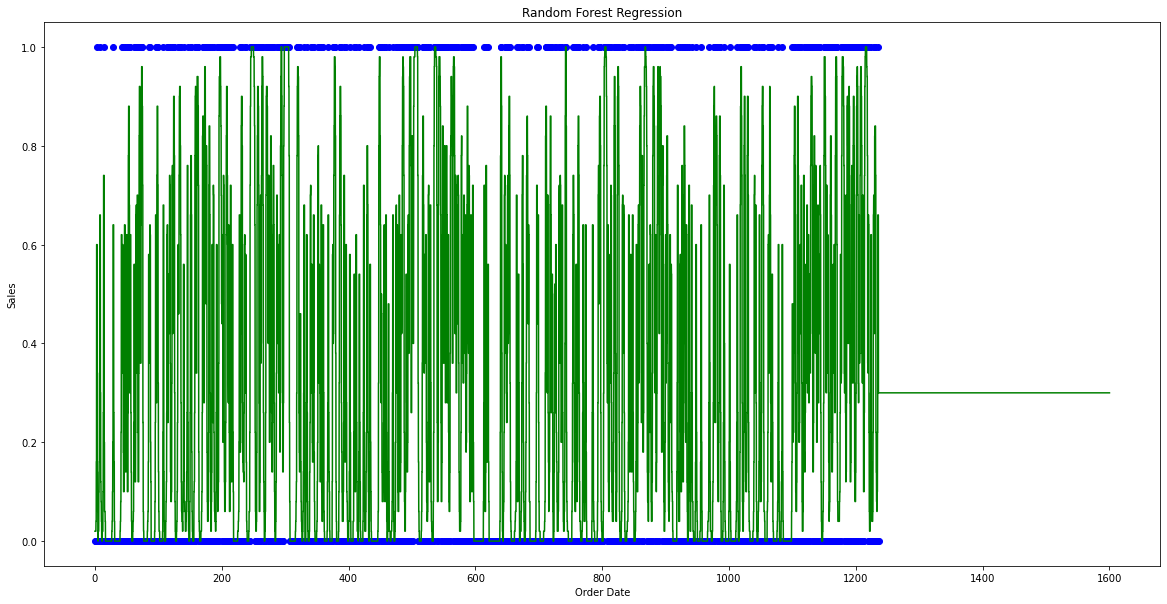

In [96]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(x, y_log)
Y_pred = regressor.predict(x)
X_grid = np.arange(min(x), 1600, 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y_log, color = 'blue')  
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [97]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_log, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_log, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_log, Y_pred)))
acc[2] = (1 - metrics.mean_absolute_error(y_log, Y_pred))*100

Mean Absolute Error: 0.15272433306386418
Mean Squared Error: 0.04398641875505255
Root Mean Squared Error: 0.20972939411311078


### Hyperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y_log)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:   12.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=0, verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 83,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

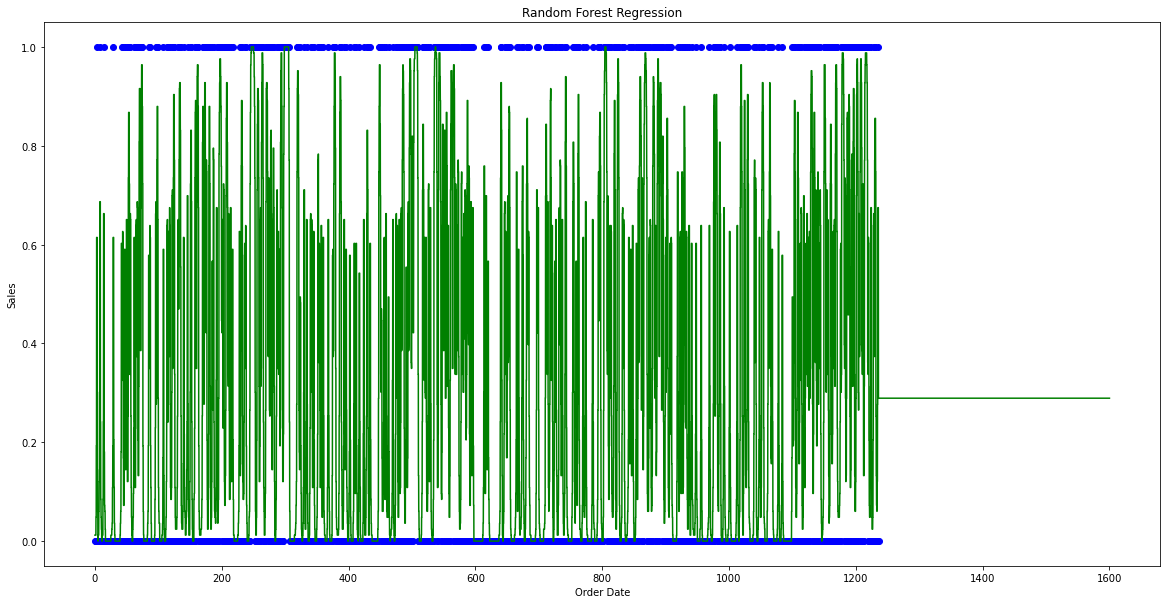

In [101]:
regressor = RandomForestRegressor(n_estimators=83, random_state=0)
regressor.fit(x, y_log)
Y_pred = regressor.predict(x)
X_grid = np.arange(min(x), 1600, 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y_log, color = 'blue')  
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_log, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_log, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_log, Y_pred)))
acc[3] = (1 - metrics.mean_absolute_error(y_log, Y_pred))*100

Mean Absolute Error: 0.15228253352942894
Mean Squared Error: 0.04275758349895966
Root Mean Squared Error: 0.20677906929609596


### Result Discussion & Conclusion

In [109]:
print('Accuracy for Random Forest Model before Hyperparameter Tuning:', acc[2])
print('Accuracy for Random Forest Model after Hyperparameter Tuning:', acc[3])
print('Improvement: ', acc[3]-acc[2])

Accuracy for Random Forest Model before Hyperparameter Tuning: 84.72756669361358
Accuracy for Random Forest Model after Hyperparameter Tuning: 84.77174664705711
Improvement:  0.04417995344353187


Text(0, 0.5, 'Accuracy')

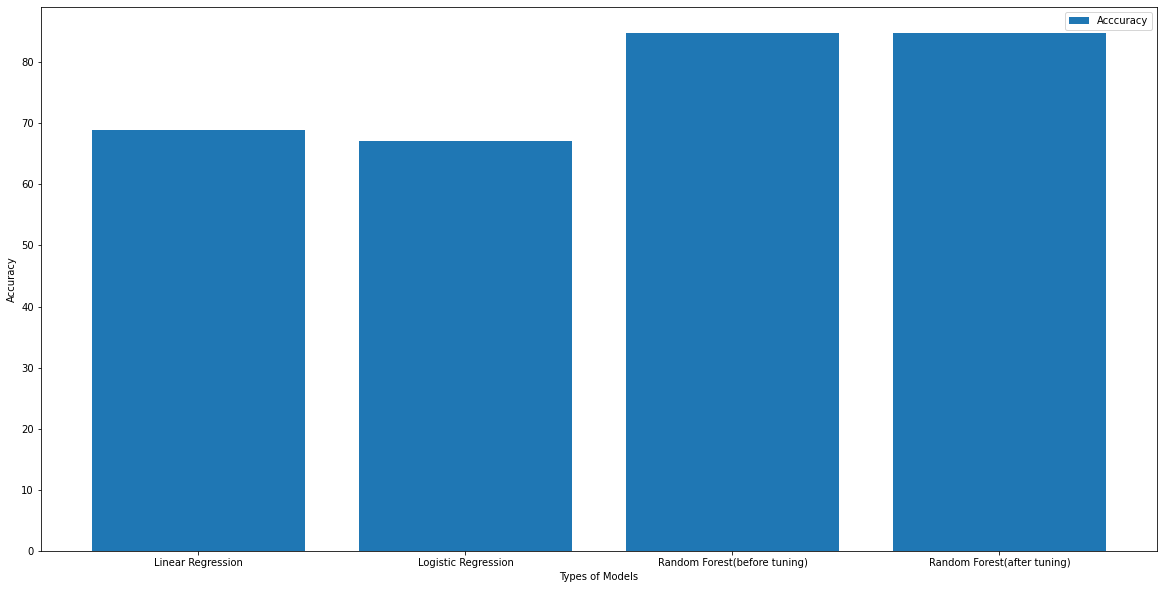

In [103]:
labels = ['Linear Regression','Logistic Regression','Random Forest(before tuning)','Random Forest(after tuning)']
plt.bar(labels,acc,label="Acccuracy")
plt.legend()
plt.xlabel("Types of Models")
plt.ylabel("Accuracy")

After the 'Monthly Growth Rate (%)' vs 'Month' graph, we finalised on the approach of linear regression. Thus, as standard, we prepared the data set accordingly, changed the dates to labels, split the data into 80% for training purposes and 20% for testing purposes, and fed the data into a linear regression model. 

The first graph shows the result of predicting the testing data after a line of regression was successfully plotted from the training data. Notice the increase in average sales throughout the years.

Next, we increased the data set to accomodate another year, so the number of months is now 60. Then, we extrapolated the graph to show the average sales of the next year to be higher than before. Along with the linear regression plot, we have shown the curve of best fit for the existing data, and it shows an increasing rate of increasing sales.

The last graph is very interesting. It shows the data points with respect to the line of regression. Here, it is very intriguing to notice how the amplitude increases with time, and it goes above and below the line of regression. This pattern feeds into the overall conclusion significantly. The Random Forest Regression essentially predicts the probability of a data point being above or below the line of regression. Hence, if the most accurate probability prediction was close to 1, then the line of regression is not reliable since most data points would lie above it,  resulting in increased sales than expected. On the other hand, if the probability prediction was closer to 0, the result would be decreased sales than expected for the most part. Ideally, we wanted the predicted probability to be closer to 0.5, and that is exactly what we get with our most accurate model, a probability of somewhere just above 0.3 as we can see from the last two graphs. After deplying the first random forest regression model, we decided to see if we can get a higher accuracy  through hyperparameter tuning, and we did, and hence we could conclude the technical part of our project as such.

With all these graphs, analysis, and prediction, we can conclude a number of things. Firstly, we can safely conclude that, according to our model, the company is expected to increase in average sales throughout the year. However, later study allowed us to realise that the predictions cannot be done solely on months, as seasons play a large role in sales of products. Thus, we avoided any preemptive analysis of using only have a year, and thus predicted by feeding the data for entire years, even if the individual data points were in terms of months. Thus, it is very easy to say that the sales will go down if you look at the first couple of months of any year in comparison to the previous year, and to avoid that we have used the data corresponding to each whole year. Therefore, our analysis has taken into account the seasonal factor and predicted the overall average sales throughout the year of 2019, the year for which no data points were present.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------